<a href="https://colab.research.google.com/github/Vaetarium/IDS25WS_Assignment/blob/main/Part2/files/Q4_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

In [1]:
!git clone https://github.com/Vaetarium/IDS25WS_Assignment.git
%cd IDS25WS_Assignment/Part2/files

Cloning into 'IDS25WS_Assignment'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 89 (delta 21), reused 62 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 13.22 MiB | 7.03 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/IDS25WS_Assignment/Part2/files


In [42]:
! pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 13.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## a) Exploration

### i)

In [21]:
df = pd.read_csv("time-series/air_traffic.csv",
                 thousands=',',
                 dtype={
                     "Year": "Int64",
                     "Month": "Int64"
                     }
                 )
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20
1,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31
2,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12
3,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02
4,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07


In [26]:
start = df[['Year', 'Month']].iloc[0]
end   = df[['Year', 'Month']].iloc[-1]
start, end

(Year     2003
 Month       1
 Name: 0, dtype: Int64,
 Year     2023
 Month       9
 Name: 248, dtype: Int64)

In [17]:
print(f"The dataset contains {df.shape[0]} monthly observations, corresponding to N months.")
print(f"Overall, the dataset includes {df['Flt'].sum():e} total flights.")

The dataset contains 249 monthly observations, corresponding to N months.
Overall, the dataset includes 1.921002e+08 total flights.


### ii)

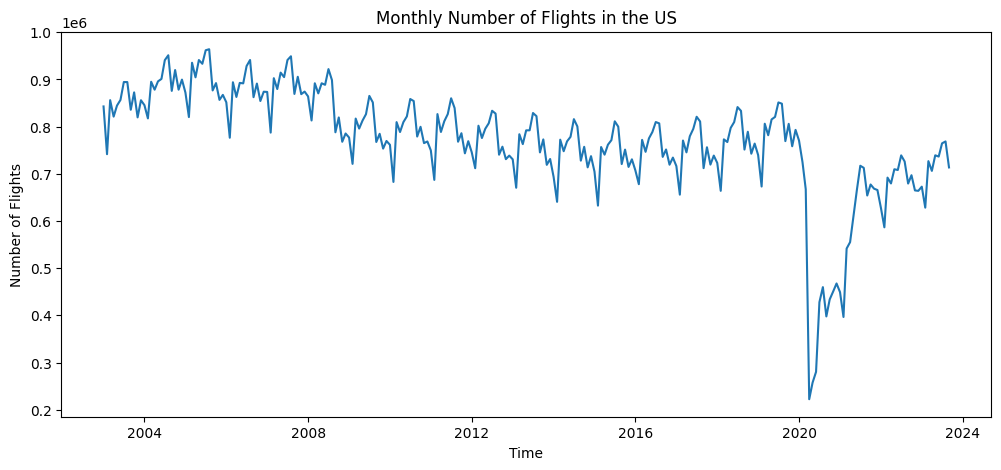

In [27]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df = df.sort_values('Date')
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Flt'])
plt.xlabel("Time")
plt.ylabel("Number of Flights")
plt.title("Monthly Number of Flights in the US")
plt.show()

The monthly number of flights exhibits a clear seasonal pattern, with recurring peaks and troughs each year. From 2003 until around 2008, the number of flights increases slightly, followed by a gradual decline and stabilization in the following decade. A dramatic drop occurs in early 2020, corresponding to the COVID-19 pandemic, after which flight numbers recover gradually but remain below pre-pandemic levels by the end of the observed period.

### iii)

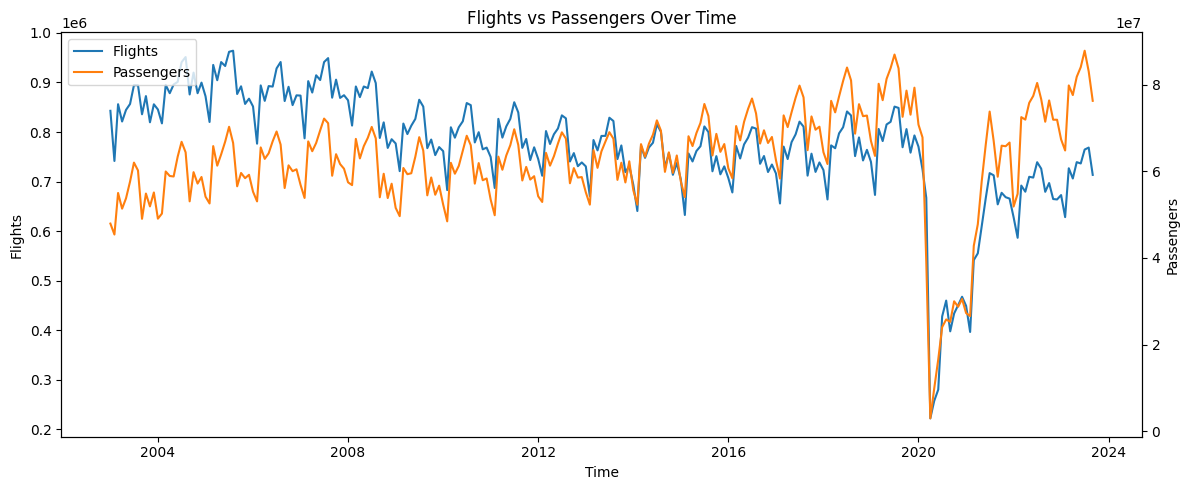

In [31]:
fig, ax1 = plt.subplots(figsize=(12,5))

l1, = ax1.plot(df['Date'], df['Flt'], label='Flights', color='tab:blue')
ax1.set_ylabel('Flights')

ax2 = ax1.twinx()
l2, = ax2.plot(df['Date'], df['Pax'], label='Passengers', color='tab:orange')
ax2.set_ylabel('Passengers')

# combined legend
ax1.legend(handles=[l1, l2], loc='upper left')
ax1.set_xlabel("Time")
plt.title("Flights vs Passengers Over Time")
fig.tight_layout()
plt.show()

The number of flights and the number of passengers follow similar long-term and seasonal trends, indicating a strong correlation between the two variables. However, passenger counts show larger relative fluctuations, especially during the COVID-19 period, where passenger numbers dropped more sharply than flights. This suggests that while the number of flights was reduced, aircraft occupancy decreased even more significantly.

## b) Investigation
### i)

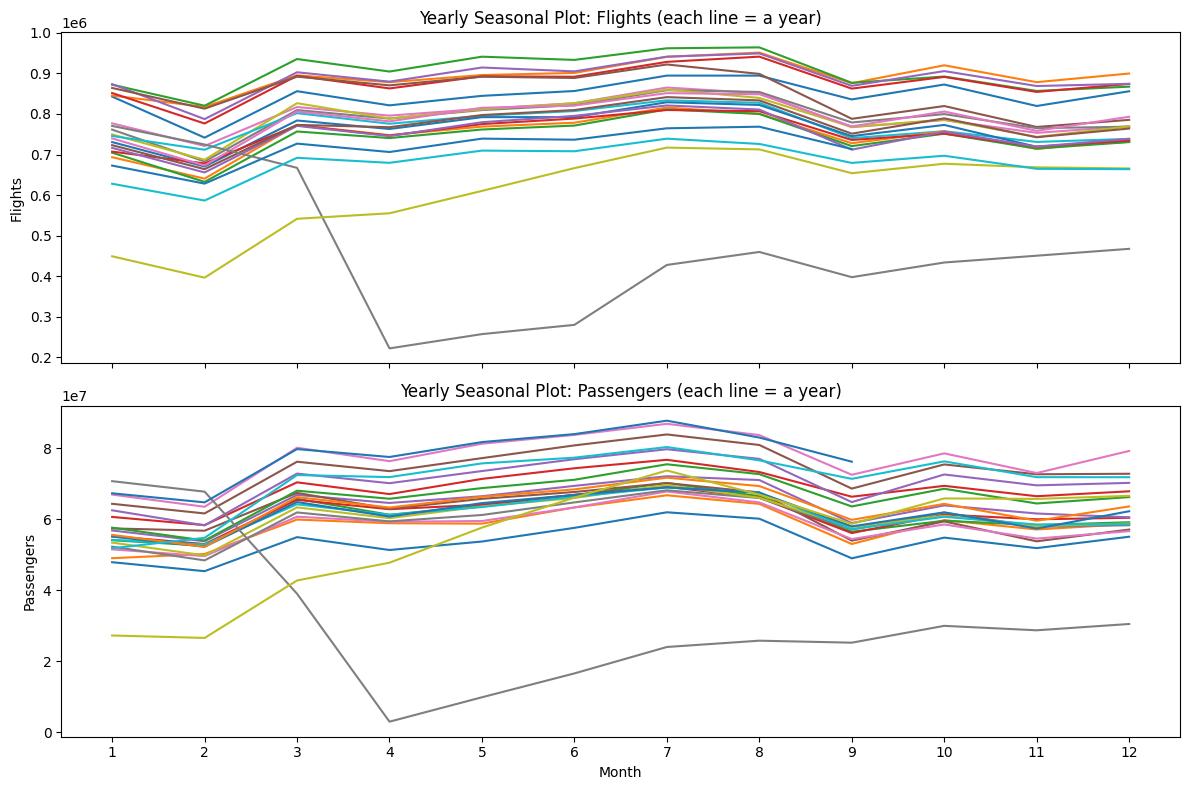

In [32]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
df = df.sort_values('Date')

# Pivot: rows=Month, cols=Year, values=series
flt_season = df.pivot_table(index='Month', columns='Year', values='Flt', aggfunc='mean')
pax_season = df.pivot_table(index='Month', columns='Year', values='Pax', aggfunc='mean')

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axes[0].plot(flt_season.index, flt_season.values)
axes[0].set_title("Yearly Seasonal Plot: Flights (each line = a year)")
axes[0].set_ylabel("Flights")

axes[1].plot(pax_season.index, pax_season.values)
axes[1].set_title("Yearly Seasonal Plot: Passengers (each line = a year)")
axes[1].set_ylabel("Passengers")
axes[1].set_xlabel("Month")

plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

The yearly seasonal plots show a strong and consistent seasonal pattern for both flights and passengers, with lowest values typically occurring in winter months and peaks during the summer (around July–August). This seasonal structure is stable across most years, indicating persistent annual travel behavior. A clear exception is the year 2020 (and partially 2021), where the usual seasonal pattern is strongly disrupted due to the COVID-19 pandemic.

### ii)

In [33]:
corr = df['Pax'].corr(df['Flt'])
corr

np.float64(0.5698387345242093)

The correlation coefficient between the passenger and flight time series is 0.57, indicating a moderate positive relationship. This means that months with more flights tend to also have more passengers, although the relationship is not perfectly linear. This is consistent with the findings in (a.iii), where both series followed similar trends but showed noticeable divergence during periods such as the COVID-19 pandemic, when passenger numbers dropped more sharply than flight counts.

### iii)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf

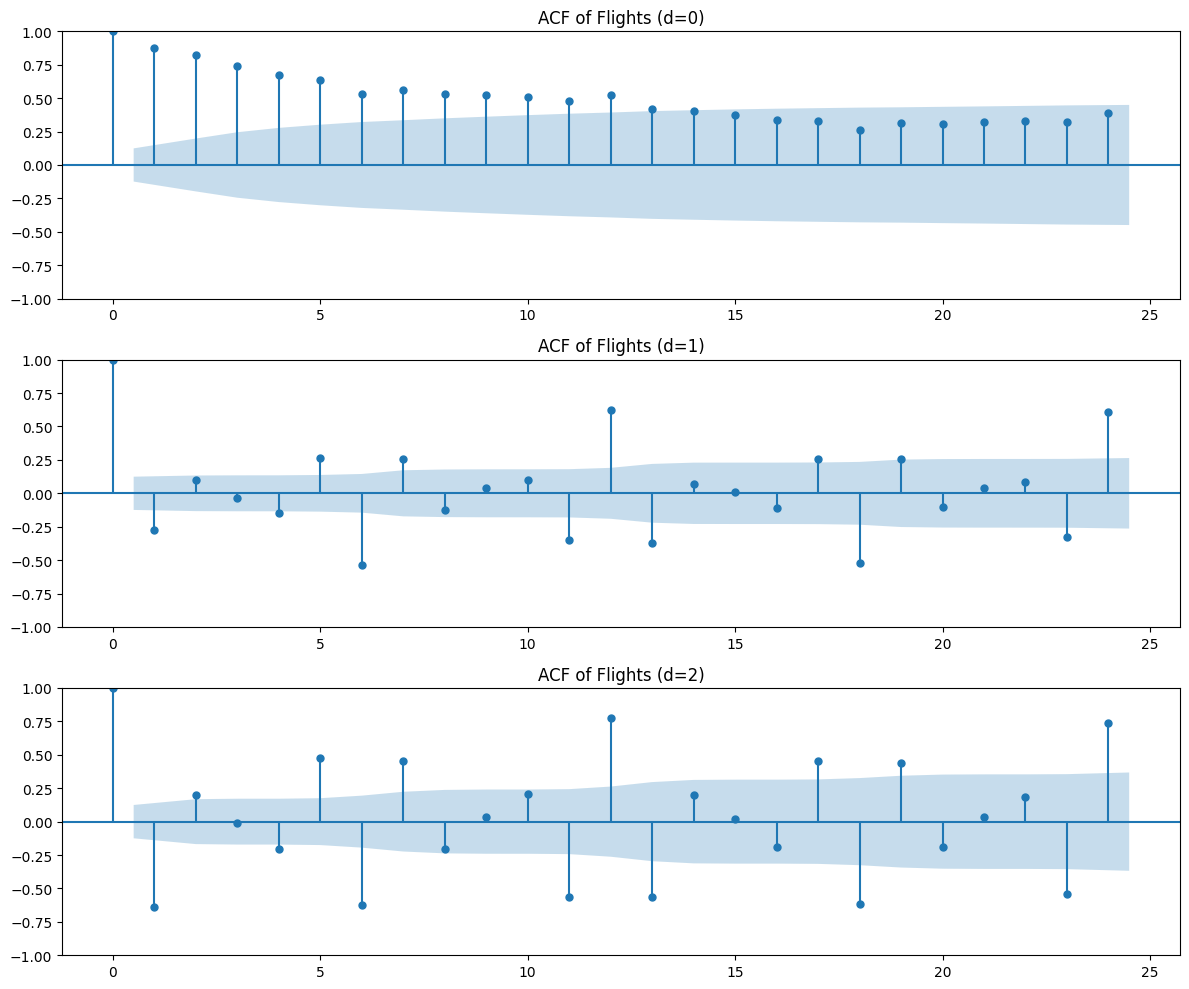

In [35]:
y0 = df['Flt']                      # no differencing
y1 = df['Flt'].diff().dropna()      # 1st difference
y2 = df['Flt'].diff().diff().dropna()  # 2nd difference

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

plot_acf(y0, lags=24, ax=axes[0])
axes[0].set_title("ACF of Flights (d=0)")

plot_acf(y1, lags=24, ax=axes[1])
axes[1].set_title("ACF of Flights (d=1)")

plot_acf(y2, lags=24, ax=axes[2])
axes[2].set_title("ACF of Flights (d=2)")

plt.tight_layout()
plt.show()

Without differencing (d = 0), the autocorrelation function shows a slow decay and significant correlations across many lags, indicating non-stationarity and strong seasonal structure. After first differencing (d = 1), short-term autocorrelation is reduced, but pronounced spikes remain at seasonal lags. After second differencing (d = 2), most autocorrelations are further reduced, although seasonal effects are still visible.

In all correlograms, the most significant non-zero autocorrelation occurs at lag 12 (and also at lag 24), reflecting strong annual seasonality in the monthly flight data.

### iv)

In [38]:
from statsmodels.tsa.seasonal import STL

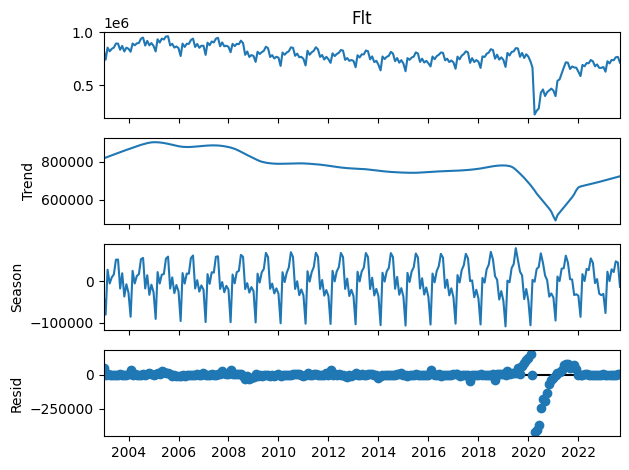

In [39]:
# Ensure it's indexed by Date for STL
ts = df.set_index('Date')['Flt'].asfreq('MS')  # monthly start frequency

stl = STL(ts, period=12, robust=True)
res = stl.fit()

res.plot()
plt.tight_layout()
plt.show()

resid = res.resid.dropna()

The residual series fluctuates around zero without a clear trend, suggesting approximate stationarity, although large outliers are visible during the COVID-19 period.

## c) Forecasting


### i)

Both the flights and passengers time series are suitable for forecasting, as they exhibit clear temporal structure, including long-term trends and strong annual seasonality. However, the presence of structural breaks, most notably during the COVID-19 period, introduces non-stationarity and makes forecasting more challenging. As a result, models must account for both trend and seasonality to achieve reasonable performance.


### ii)

In [43]:
from sktime.forecasting.arima import StatsModelsARIMA
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [48]:
train = pd.read_csv("time-series/flights_train.csv", thousands=",")
test  = pd.read_csv("time-series/flights_test.csv", thousands=",")

# Create datetime index
for df in [train, test]:
    df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str))
    df.set_index("Date", inplace=True)

y_train = train["Flt"].to_period("M")
y_test  = test["Flt"].to_period("M")

In [49]:
from sktime.forecasting.base import ForecastingHorizon
# Define forecasting horizon--Test sets
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [50]:
from sktime.forecasting.naive import NaiveForecaster

naive = NaiveForecaster(strategy="mean")
naive.fit(y_train)
y_pred_naive = naive.predict(fh)

In [57]:
from sktime.forecasting.arima import StatsModelsARIMA

# example of a well-performing model
arima = StatsModelsARIMA(order=(6, 1, 6))
arima.fit(y_train)
y_pred_arima = arima.predict(fh)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
# Evaluation metrics
from sktime.performance_metrics.forecasting import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)
import numpy as np

def metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
    }

naive_metrics = metrics(y_test, y_pred_naive)
arima_metrics = metrics(y_test, y_pred_arima)

naive_metrics, arima_metrics

({'RMSE': np.float64(51192.09540780126),
  'MAE': np.float64(36663.857638888876),
  'MAPE': np.float64(0.049011246090680395)},
 {'RMSE': np.float64(36483.55135089389),
  'MAE': np.float64(30610.66345240847),
  'MAPE': np.float64(0.03887865863921556)})


### iii)

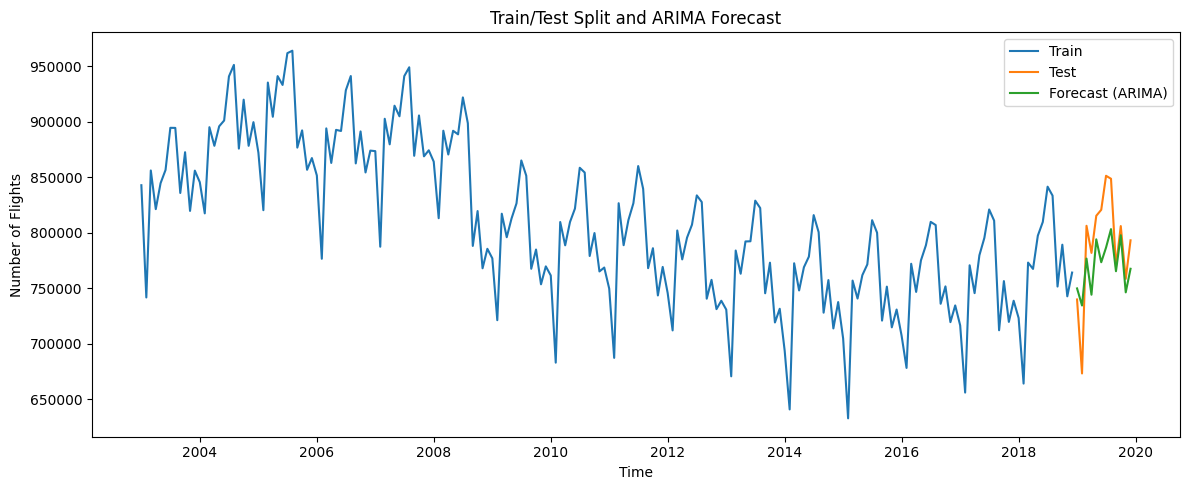

In [60]:

y_train_plot = y_train.to_timestamp() if hasattr(y_train.index, "to_timestamp") else y_train
y_test_plot  = y_test.to_timestamp()
y_pred_plot  = y_pred_arima.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(y_train_plot.index, y_train_plot, label="Train")
plt.plot(y_test_plot.index, y_test_plot, label="Test")
plt.plot(y_pred_plot.index, y_pred_plot, label="Forecast (ARIMA)")

plt.xlabel("Time")
plt.ylabel("Number of Flights")
plt.title("Train/Test Split and ARIMA Forecast")
plt.legend()
plt.tight_layout()
plt.show()

The ARIMA forecast captures the overall level and short-term dynamics of the flight time series reasonably well, producing predictions that lie within the range of the observed test values. The model follows the general seasonal oscillations but tends to smooth extreme fluctuations, slightly underestimating peaks and overestimating troughs. Overall, the forecast improves upon a naive baseline but remains limited in its ability to fully capture variability, especially during periods of rapid change.